# K-means y hierarchical clustering

In [163]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [164]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("C:\\Users\\usuario\\Desktop\\analisis tarea 4\\Mall_customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
dataset.shape

(200, 5)

In [166]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [167]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [168]:
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


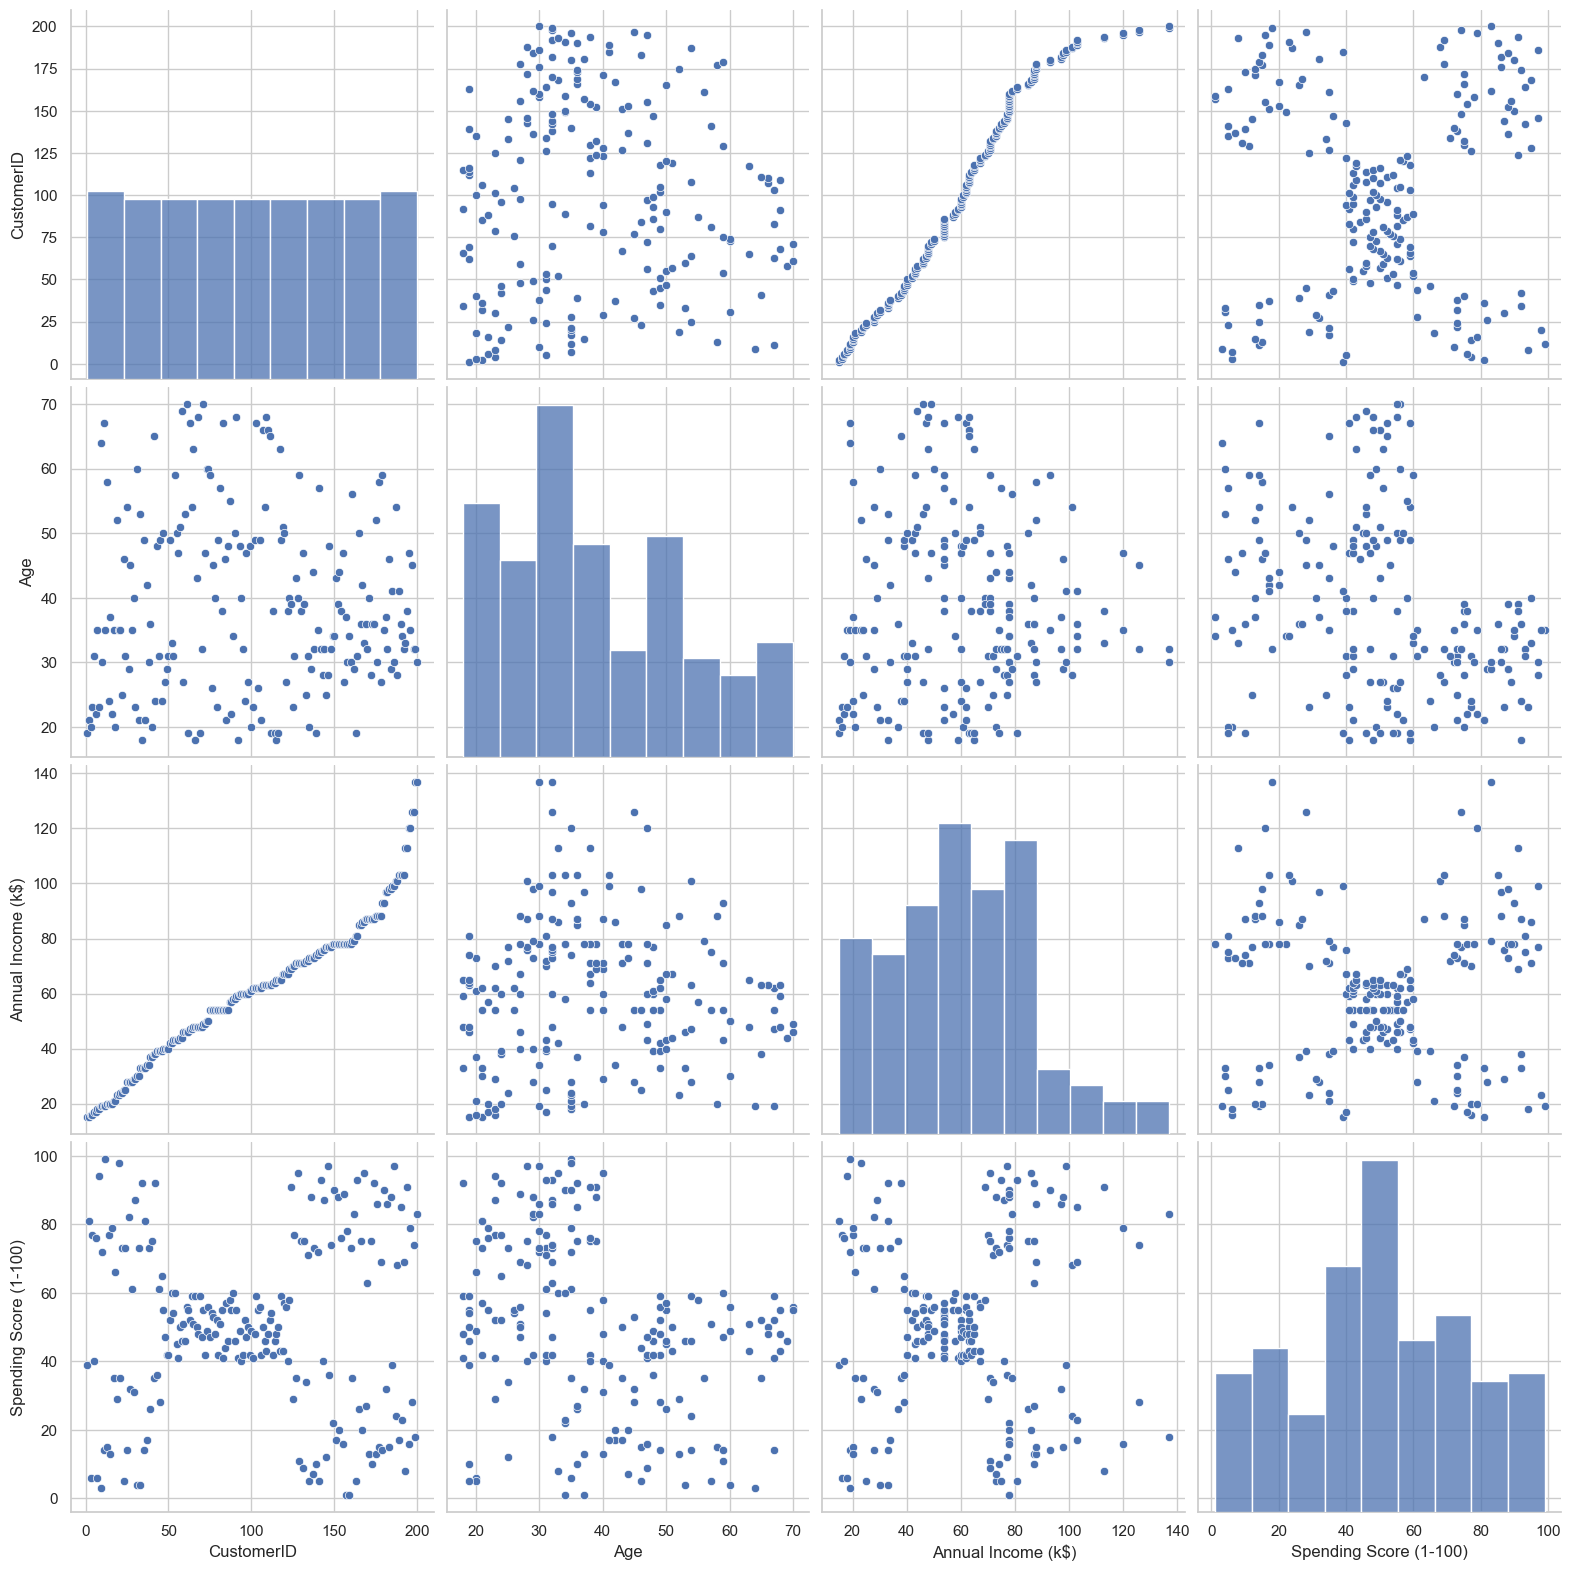

In [169]:
sns.pairplot(dataset.dropna(), size=4,kind='scatter')

In [170]:
# Iniciamos el Codificador
le = LabelEncoder()

# Ajusta y transforma la columna 'Gender'
dataset['Gender'] = le.fit_transform(dataset['Gender'])

# Imprime el conjunto de datos actualizado
dataset.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [171]:
# Calcular la matriz de correlación
corr_matrix = dataset.corr()
corr_matrix

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


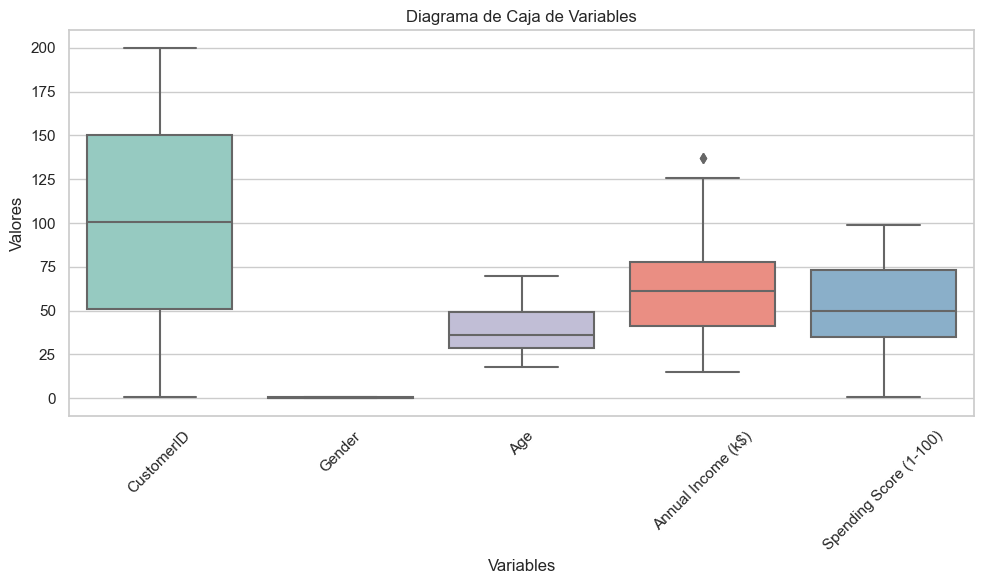

In [172]:
# creamos un diagrama de caja que muestre la disperción cada variable individual
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  
sns.boxplot(data=dataset, palette="Set3")  
plt.title('Diagrama de Caja de Variables')  
plt.xlabel('Variables')  
plt.ylabel('Valores')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [173]:
# Estandarizar los datos antes de aplicar K-Means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
X

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


# K-MEANS

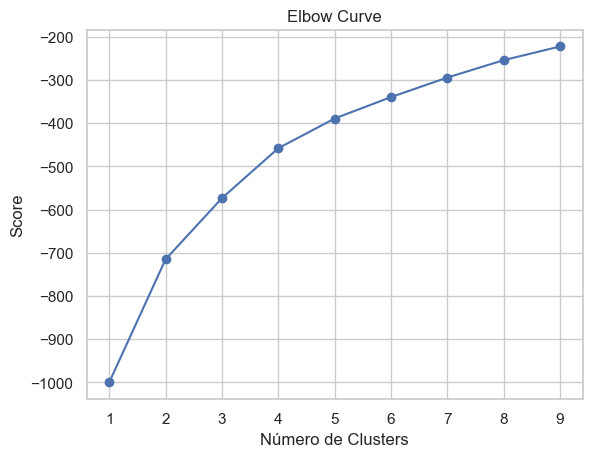

In [174]:
# generamos la grafica de curva de codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [175]:

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.48768665,  0.05791853,  1.11866328, -0.44004581, -0.39052064],
       [-0.90562646, -0.20289471, -0.9286097 , -0.86859989,  0.33053786],
       [ 1.02408784,  0.09569148, -0.24490383,  0.96005657,  0.08104001]])

In [176]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

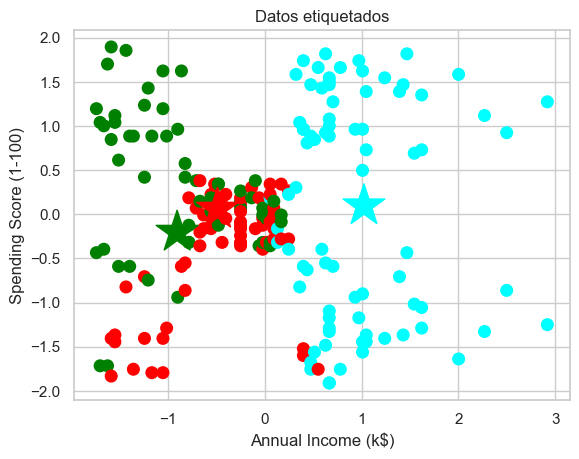

In [177]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

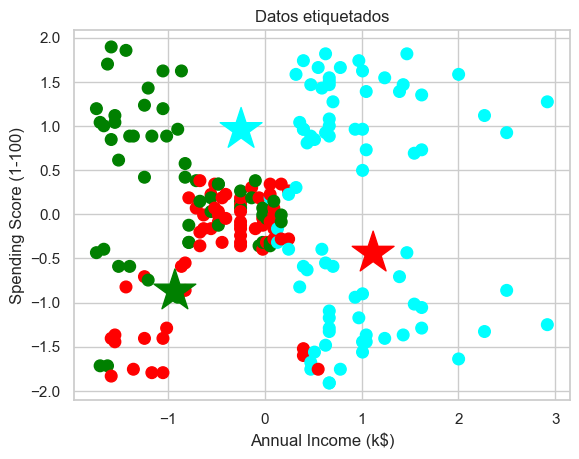

In [178]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

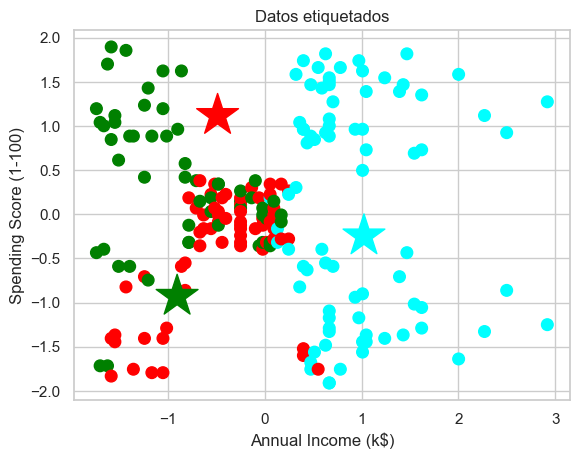

In [179]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [180]:
X_new = scaler.fit_transform(np.array([[5.4,3.3,1.2,0.25,0.5]]))  
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)


[0]
['red']


In [181]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.25477077954736904
Índice de Calinski-Harabasz: 73.18218394801194
Inertia (suma de cuadrados dentro de los clusters): 573.7345467939024
Davies-Bouldin Index: 1.3407476723632037


# hierarchical clustering

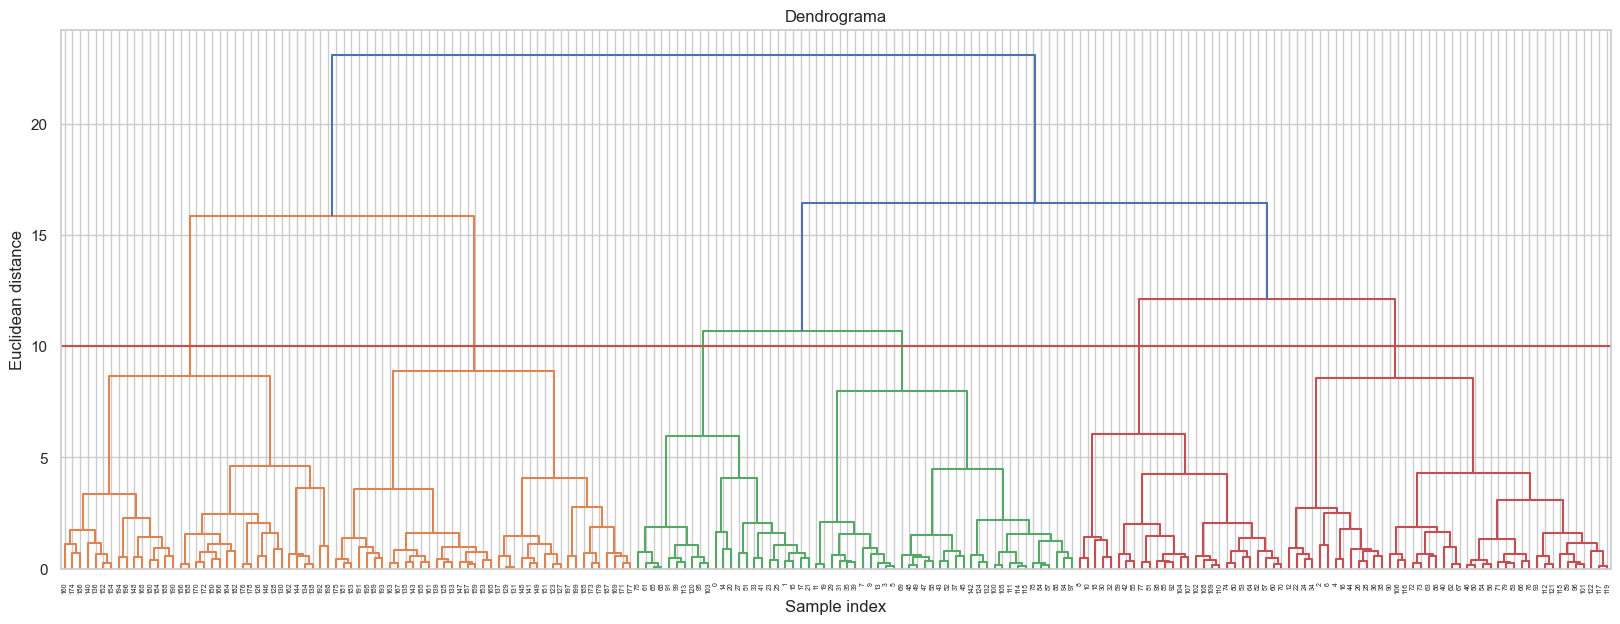

In [182]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [183]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [184]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

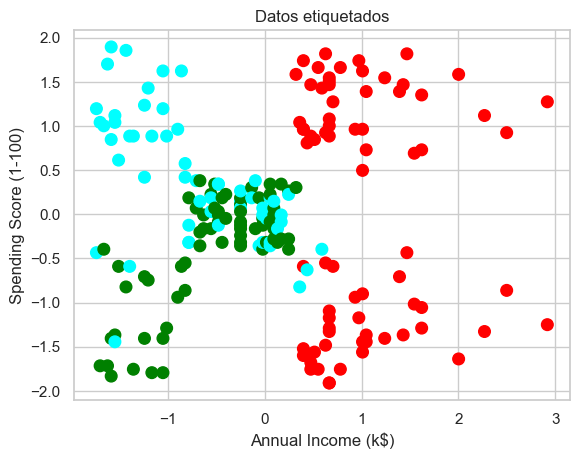

In [185]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [186]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()


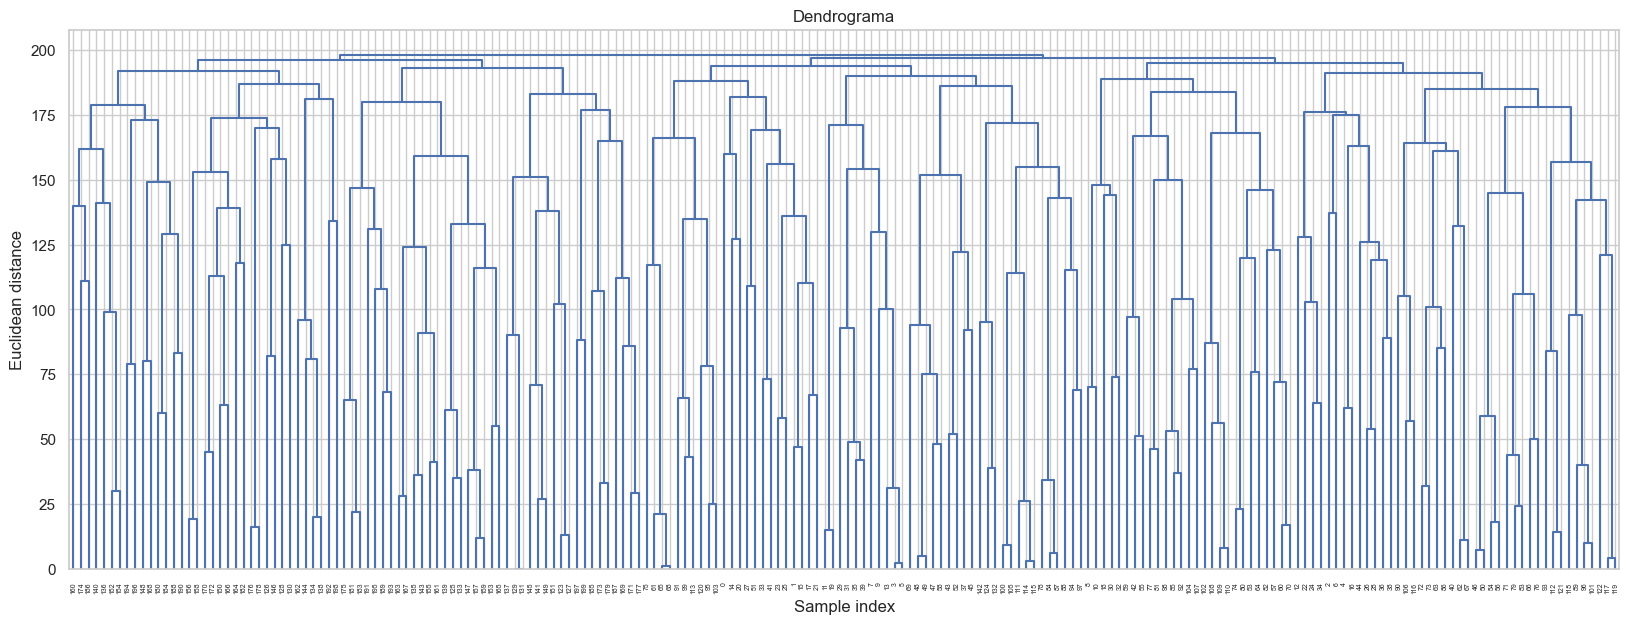

In [187]:
plot_dendrogram(hier_clustering, color_threshold=0)


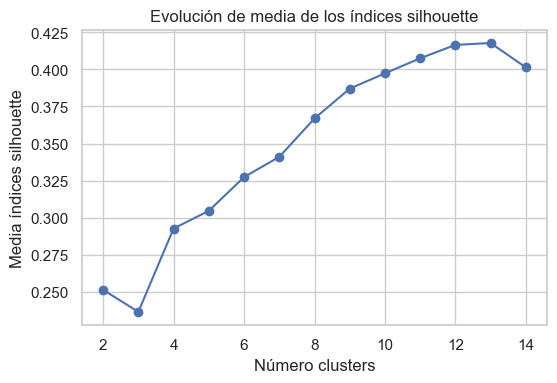

In [188]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');


In [189]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))



Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.2363944459266719
Índice de Calinski-Harabasz: 66.01246683410993
Davies-Bouldin Index: 1.445010815576129


In [190]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6135110636355512, array([ 4.05770035, 16.44353185, 10.65959642, ..., 15.84831745,
        0.56583001, 15.84831745]))


In [191]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means: ")
print("Puntaje de silueta:", metrics.silhouette_score (X, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score (X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score (X, labels))

Medidas de calidad para K-Means: 
Puntaje de silueta: 0.2363944459266719
Índice de Calinski-Harabasz: 66.01246683410993
Inertia (suma de cuadrados dentro de los clusters): 573.7345467939024
Davies-Bouldin Index: 1.445010815576129


# Hierarchical Clustering

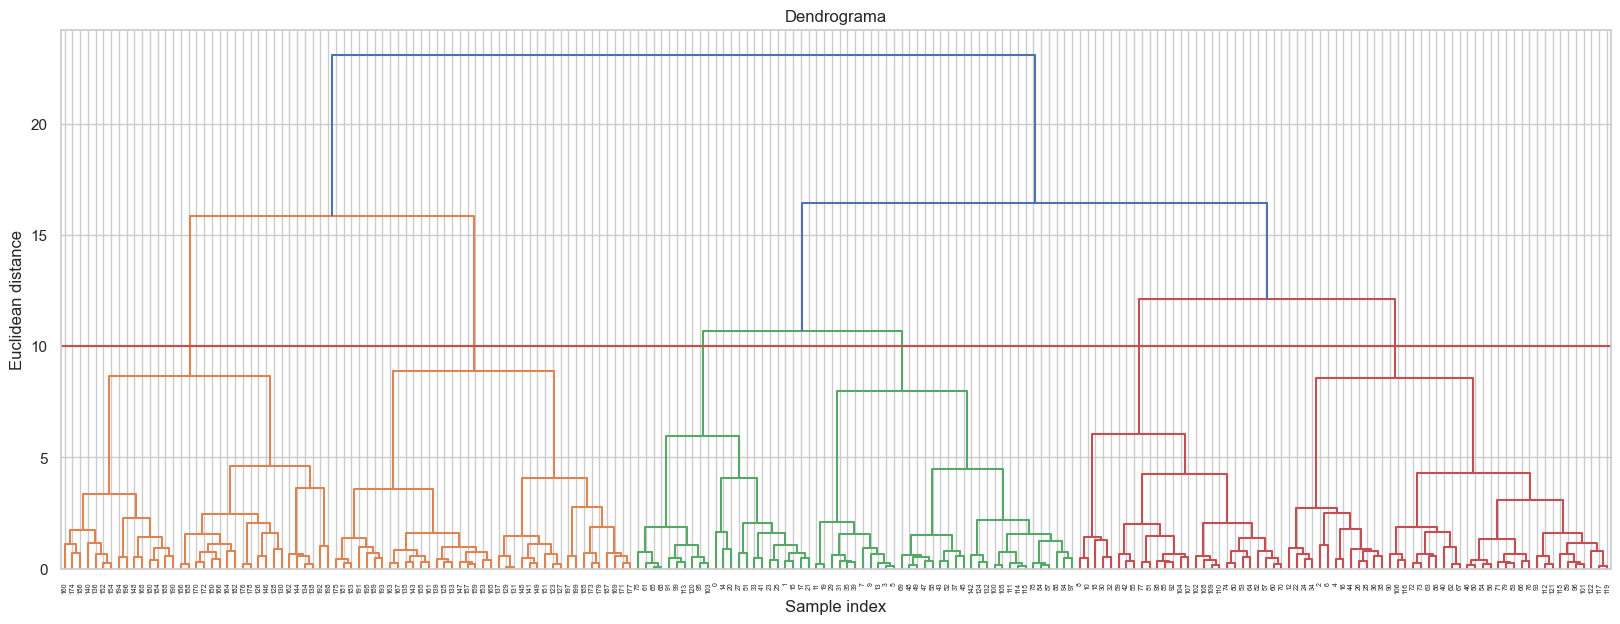

In [192]:
ward_clustering = linkage (X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram (ward_clustering)
plt.axhline(y= 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [193]:
hier_clustering = AgglomerativeClustering (n_clusters=3)
labels_hier=hier_clustering.fit_predict(X)
labels_hier

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [194]:
labels = labels_hier
colores=['red', 'green', 'cyan','blue']
asignar=[]
for row in labels:
    asignar.append(colores [row])

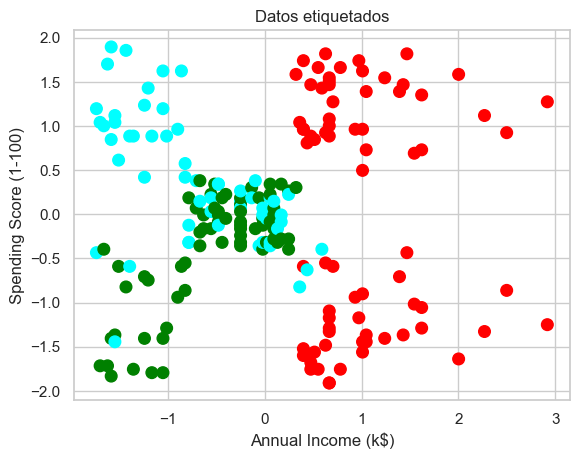

In [195]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [196]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Distancia euclidiana')
    plt.show()

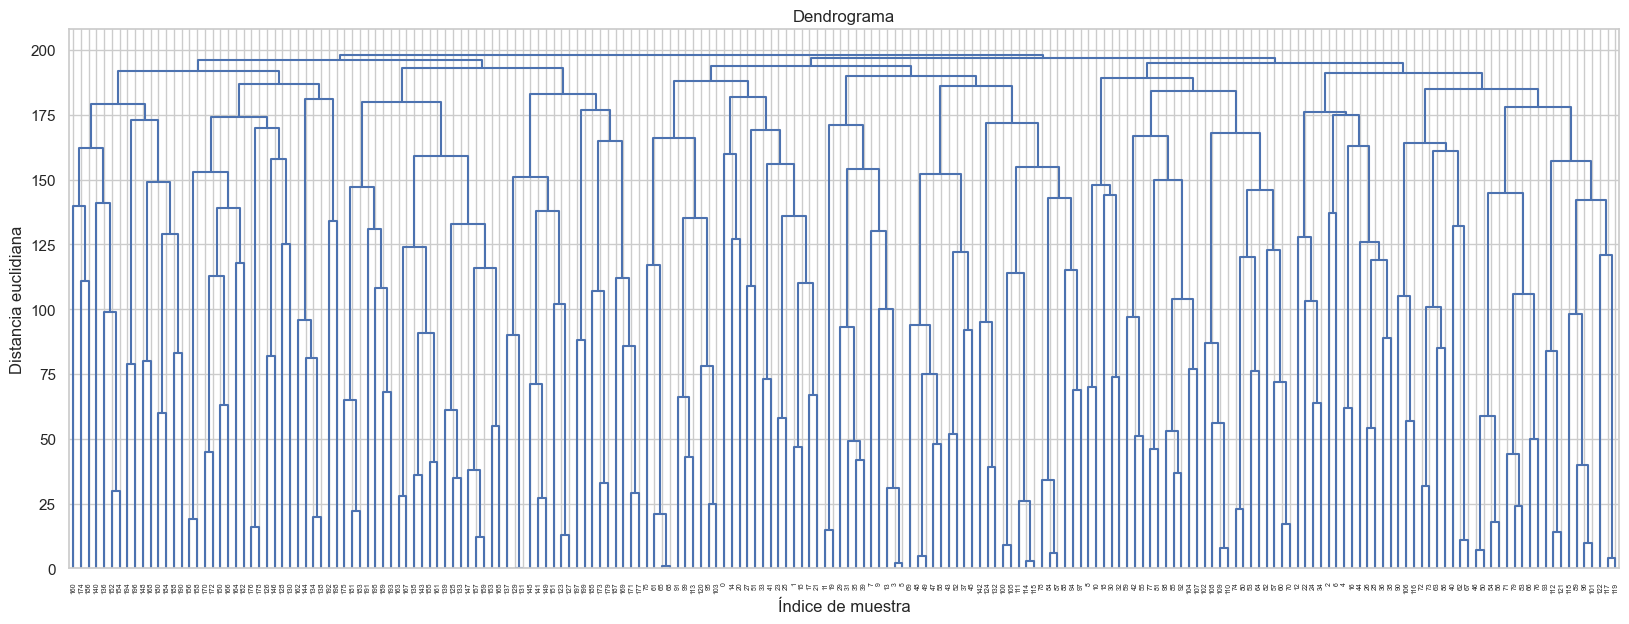

In [197]:
plot_dendrogram(hier_clustering, color_threshold= 0)

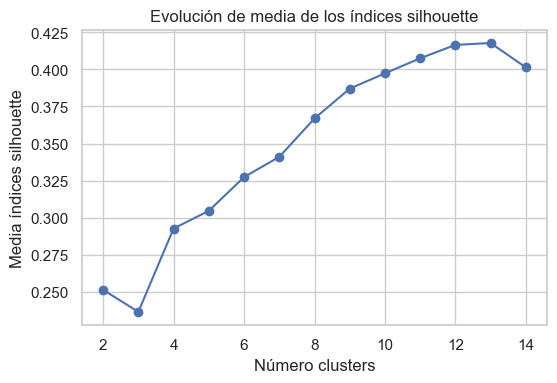

In [198]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        affinity='euclidean',
        linkage='ward',
        n_clusters=n_clusters
    )

    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [199]:
# Calcular medidas de calidad para clustering Jerárquico
print("Medidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.2363944459266719
Índice de Calinski-Harabasz: 66.01246683410993
Davies-Bouldin Index: 1.445010815576129
